<a href="https://colab.research.google.com/github/JuanPabloSanchez2/SRA-labs/blob/main/OsciladorRelajacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscilador de Relajación

Este circuito genera una señal periódica no sinusoidal (formas de onda cuadradas en este caso) mediante un proceso cíclico de carga y descarga de un componente reactivo, en este caso un capacitor.

En el siguiente script se buscara la automatización del calculo de los componentes a partir de valores dados.

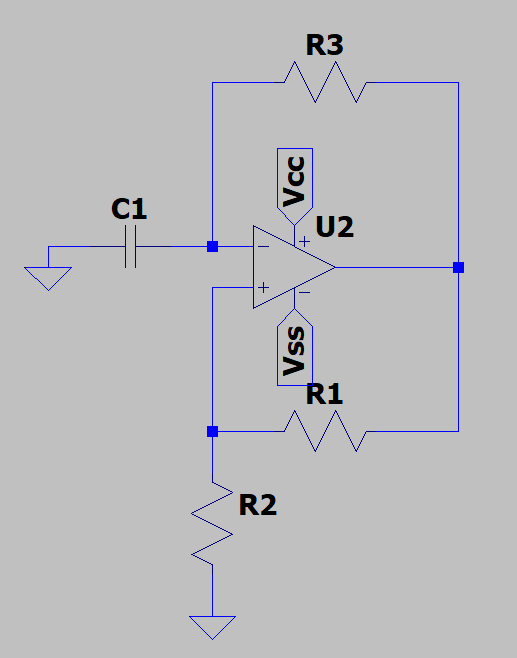

Figura: Circuito donde calcularemos los valores.

La formula para calcular la tensión de salida es la siguiente.

# T = 2⋅R⋅C⋅ln((1+B)/(1-B))

Donde

      T: Periodo;  
      R: Resistencia de realimentacion;  
      C: Capacidad;  
      B: Factor de realimentacion R2/(R1+R2);  


--- Calculadora de Frecuencia de Oscilador (Op-Amp) ---
Ingrese el valor de R3 (resistencia de realimentacion negativa) [kOhm]: 2
Ingrese el valor de C [uF]: 1
Ingrese el valor de R1 (resistencia de realimentacion positiva)[kOhm]: 0.5
Ingrese el valor de R2 [kOhm]: 3

--- Resultados del Cálculo ---
Factor Beta (B): 0.8571
Periodo (T): 10.2598 ms
Frecuencia (f): 0.0975 kHz


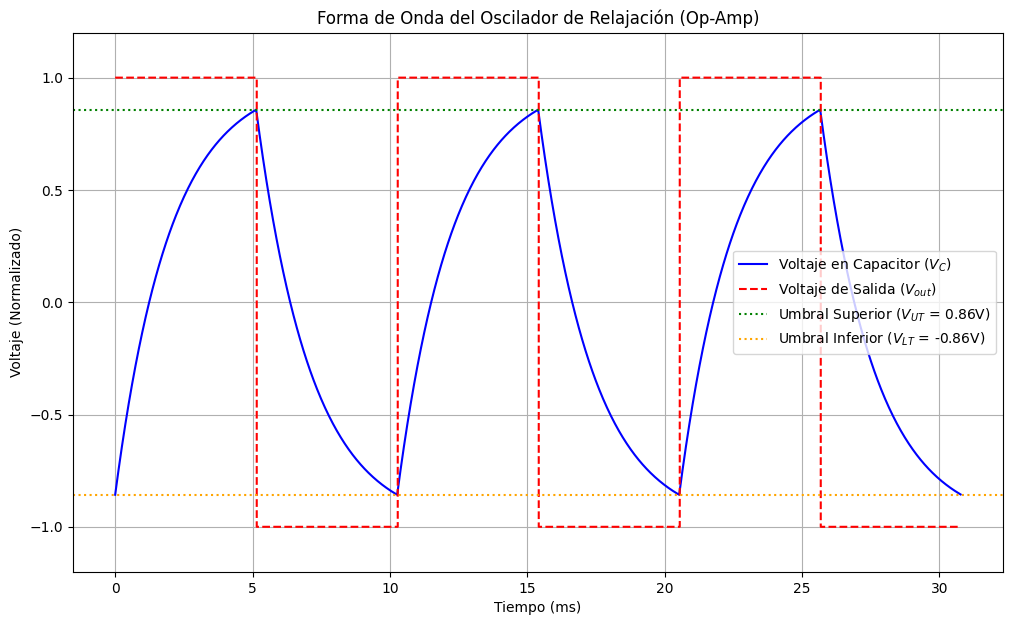

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Este codigo nos permite calcular el valor de frecuencia de oscilacion que poseerá un circuito como el diagramado si conocemos todos los valores de los componentes.
# Ademas es capaz de generar la forma de onda vista tanto a la salida Vo, como a los bornes del capacitor Vc.

print("--- Calculadora de Frecuencia de Oscilador (Op-Amp) ---")
R = float(input("Ingrese el valor de R3 (resistencia de realimentacion negativa) [kOhm]: "))
C = float(input("Ingrese el valor de C [uF]: "))
R1 = float(input("Ingrese el valor de R1 (resistencia de realimentacion positiva)[kOhm]: "))
R2 = float(input("Ingrese el valor de R2 [kOhm]: "))

# Asegurarse de que no haya división por cero
if (R1 + R2) == 0:
    print("Error: R1 + R2 no pueden ser cero.")
else:
    B = R2 / (R1 + R2)  # Factor Beta de realimentación positiva
    T = 2 * R * C * np.log((1 + B) / (1 - B))  # Periodo en milisegundos (ms)

    if T == 0:
        print("Error: El periodo es cero. Revise los valores.")
    else:
        f = 1 / T  # Frecuencia en kiloHertz (kHz)

        print(f"\n--- Resultados del Cálculo ---")
        print(f"Factor Beta (B): {B:.4f}")
        print(f"Periodo (T): {T:.4f} ms")
        print(f"Frecuencia (f): {f:.4f} kHz")

        # Asumimos voltajes de saturación simétricos normalizados (+1V y -1V)
        # La forma de onda es la misma, solo cambia la amplitud.
        V_sat = 1.0
        V_ut = B * V_sat   # Umbral superior (Upper Threshold)
        V_lt = -B * V_sat  # Umbral inferior (Lower Threshold)

        # Generación de la forma de onda
        t = np.linspace(0, 3 * T, 1500)  # Vector de tiempo para 3 periodos (T está en ms)
        v_c = np.zeros_like(t)      # Voltaje del capacitor
        v_out = np.zeros_like(t)    # Voltaje de salida del Op-Amp

        v_c_actual = V_lt  # Empezamos en el umbral inferior
        v_out_actual = V_sat
        tiempo_inicio_ciclo = 0

        for i in range(len(t)):
            t_rel = t[i] - tiempo_inicio_ciclo # Tiempo relativo al inicio del ciclo actual

            if v_out_actual == V_sat:
                # Cargando el capacitor hacia V_sat
                v_c[i] = V_sat + (v_c_actual - V_sat) * np.exp(-t_rel / (R * C))
                v_out[i] = V_sat

                # Si cruzamos el umbral superior, cambiamos de estado
                if v_c[i] >= V_ut:
                    v_c[i] = V_ut
                    v_c_actual = V_ut       # El nuevo punto de inicio es V_ut
                    v_out_actual = -V_sat   # Invertimos la salida
                    tiempo_inicio_ciclo = t[i] # Reiniciamos el tiempo del ciclo

            else: # v_out_actual == -V_sat
                # Descargando el capacitor hacia -V_sat
                v_c[i] = -V_sat + (v_c_actual - (-V_sat)) * np.exp(-t_rel / (R * C))
                v_out[i] = -V_sat

                # Si cruzamos el umbral inferior, cambiamos de estado
                if v_c[i] <= V_lt:
                    v_c[i] = V_lt
                    v_c_actual = V_lt       # El nuevo punto de inicio es V_lt
                    v_out_actual = V_sat    # Invertimos la salida
                    tiempo_inicio_ciclo = t[i] # Reiniciamos el tiempo del ciclo

        # Visualización con Matplotlib
        plt.figure(figsize=(12, 7))
        plt.plot(t, v_c, label=f'Voltaje en Capacitor ($V_C$)', color='blue')
        plt.plot(t, v_out, label='Voltaje de Salida ($V_{out}$)', color='red', linestyle='--', drawstyle='steps-post')

        # Dibujar líneas de umbral
        plt.axhline(y=V_ut, color='green', linestyle=':', label=f'Umbral Superior ($V_{{UT}}$ = {V_ut:.2f}V)')
        plt.axhline(y=V_lt, color='orange', linestyle=':', label=f'Umbral Inferior ($V_{{LT}}$ = {V_lt:.2f}V)')

        plt.title('Forma de Onda del Oscilador de Relajación (Op-Amp)')
        plt.xlabel('Tiempo (ms)') # El eje X está en milisegundos
        plt.ylabel('Voltaje (Normalizado)')
        plt.legend(loc='best')
        plt.grid(True)
        plt.ylim(-V_sat * 1.2, V_sat * 1.2)

        # Guardar el gráfico en un archivo
        # plt.savefig('oscilador_opamp_forma_de_onda.png')
        # print("\nGráfico de forma de onda guardado como 'oscilador_opamp_forma_de_onda.png'")

        # Mostrar el gráfico en la salida de Colab
        plt.show()

In [9]:
import numpy as np

# Este codigo nos permite calcular el valor de los que necesitamos emplear para una frecuencia de oscilacion determinada.
# Deje el valor de R o C en cero, si desea calcular ese determinado valor.

f = float(input("Ingrese el valor de la frecuencia deseada de oscilacion[kHz]: "))
R1 = float(input("Ingrese el valor de R1 (resistencia de realimentación positiva) [kOhm]: "))
R2 = float(input("Ingrese el valor de R2[kOhm]: "))
B = R2/(R1+R2)
R = float(input("Ingrese el valor de R3 (resistencia de realimentación negativa) [kOhm]: "))

if(R == 0):
    C = float(input("Ingrese el valor de capacidad[uF]: "))
    while(C == 0):
        C = float(input("Ingrese el valor de capacidad[uF]: "))
    R = 1 / (f*2*C*np.log((1 + B) / (1 - B)))
    print("El valor de resistencia de realimentación será[kOhm]:", R)
else:
        C = 1 / (f*2*R*np.log((1 + B) / (1 - B)))
        print("El valor de capacidad[uF]:", C)

Ingrese el valor de la frecuencia deseada de oscilacion[kHz]: 0.1
Ingrese el valor de R1 (resistencia de realimentación positiva) [kOhm]: 0.5
Ingrese el valor de R2[kOhm]: 3
Ingrese el valor de R3 (resistencia de realimentación negativa) [kOhm]: 2
El valor de capacidad[uF]: 0.9746781131282004
